# Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset.

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height
    
px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Calling the train data set
Mobile_Train=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\MobileDataSets\MobileDataSets\MobileTrain.csv')
Mobile_Train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
#Calling the test dataset
Mobile_Test=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\MobileDataSets\MobileDataSets\MobileTest.csv')
Mobile_Test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


# Data Pre-processing

#TRAIN DATA

In [4]:
Mobile_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
Mobile_Train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
Mobile_Train.shape

(2000, 21)

In [7]:
Mobile_Train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
Mobile_Train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
Mobile_Train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [10]:
Mobile_Train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
Mobile_Train.duplicated().sum()

0

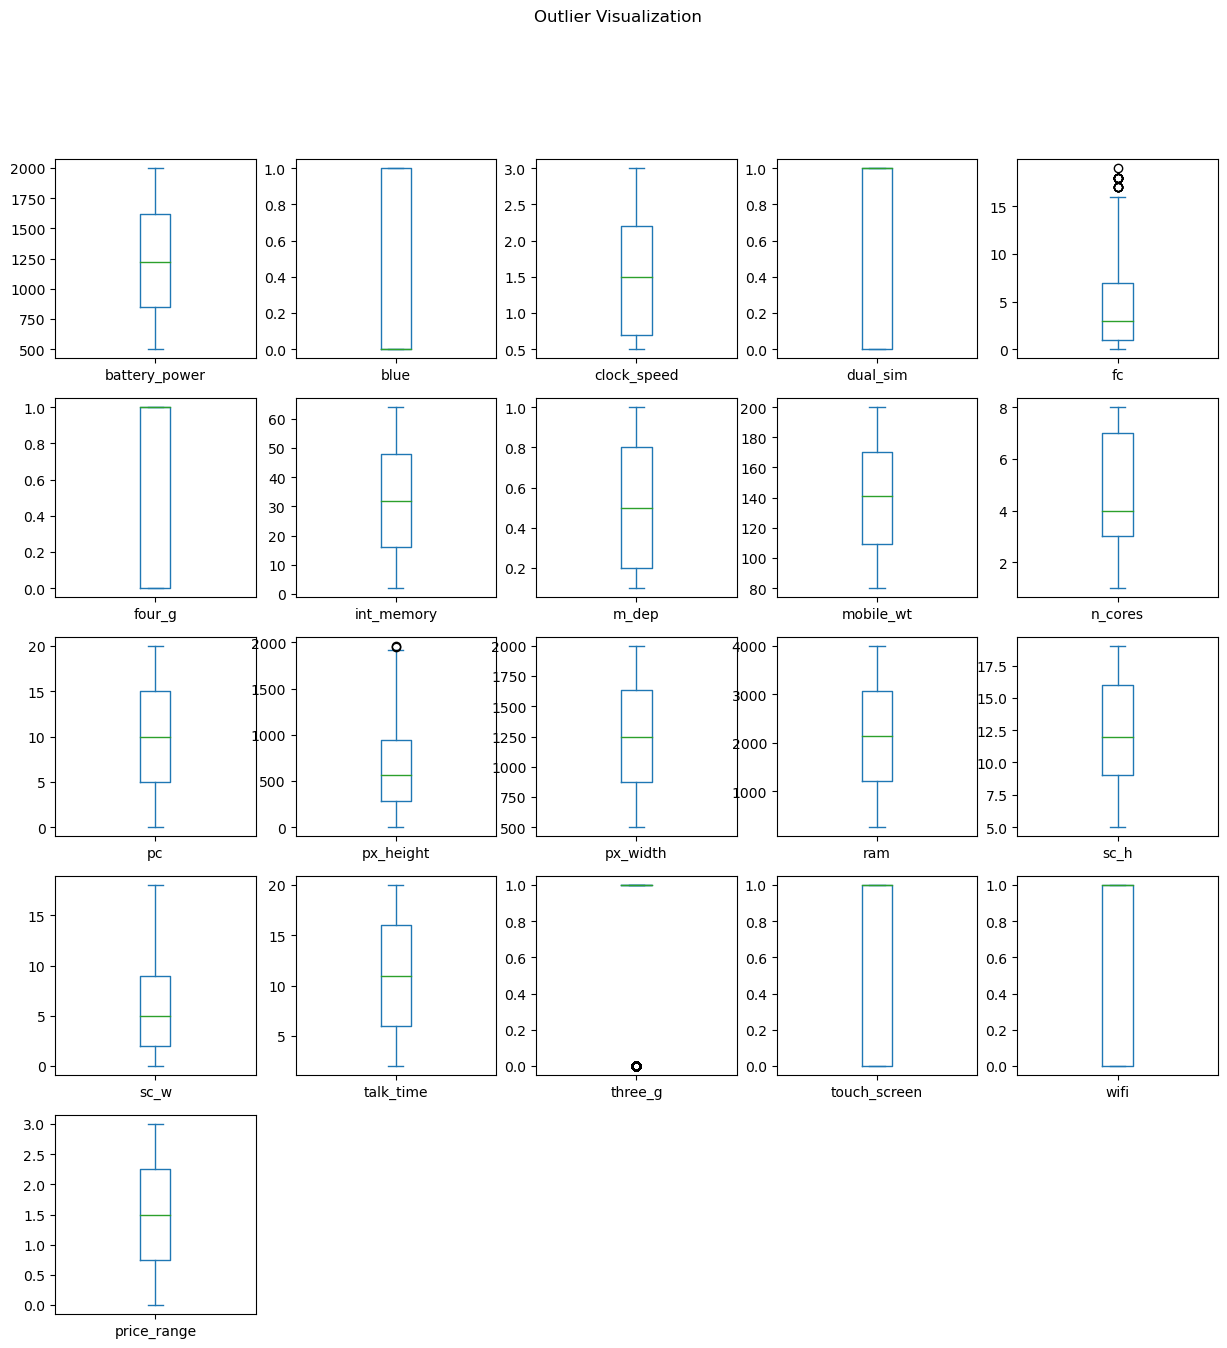

In [12]:
Mobile_Train.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

#There are few outliers in the dataset which are not considered here as outliers.

#TEST DATA

In [13]:
Mobile_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [14]:
Mobile_Test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [15]:
Mobile_Test.shape

(1000, 21)

In [16]:
Mobile_Test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [17]:
Mobile_Test.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [18]:
Mobile_Test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [19]:
Mobile_Test.duplicated().sum()

0

# Exploratory Data Visualization

#TARGET COLUMN

<AxesSubplot:xlabel='price_range', ylabel='count'>

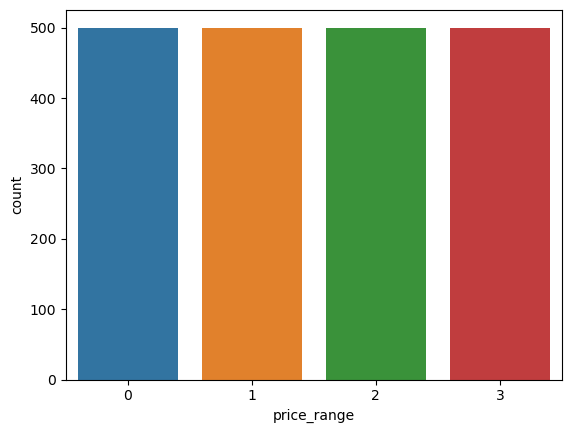

In [20]:
sns.countplot(x='price_range', data=Mobile_Train)

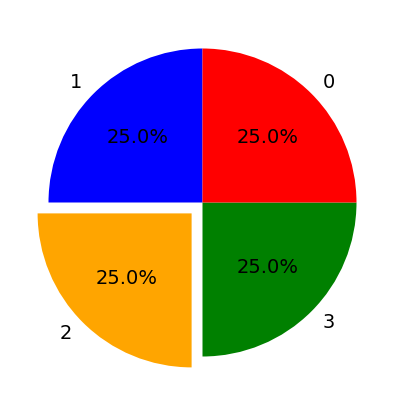

In [21]:
plt.rcParams['figure.figsize'] =5,5
labels = Mobile_Train['price_range'].value_counts().index.tolist()
sizes = Mobile_Train['price_range'].value_counts().tolist()
explode = (0, 0.1,0,0)
colors = ['blue','orange','green','red']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

#The data is balanced.

#UNIVARIATE VISUALIZATION

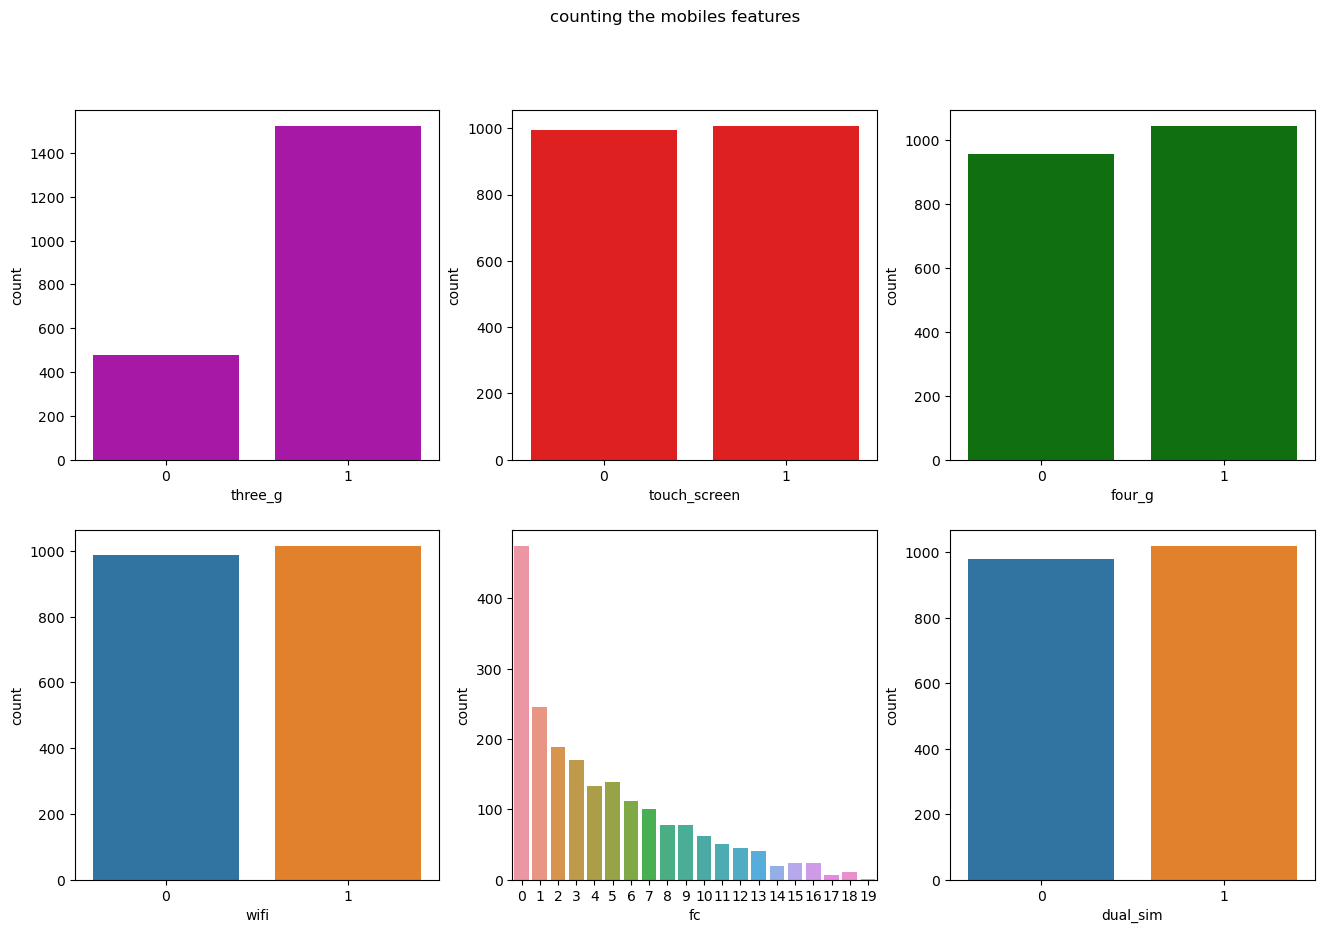

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig .suptitle("counting the mobiles features")
sns.countplot(ax=axes[0, 0], data=Mobile_Train, x='three_g', color="m")
sns.countplot(ax=axes[0, 1], data=Mobile_Train, x='touch_screen',color="r")
sns.countplot(ax=axes[0, 2], data=Mobile_Train, x='four_g',color="g")
sns.countplot(ax=axes[1,0], data=Mobile_Train, x='wifi')
sns.countplot(ax=axes[1,1],data = Mobile_Train, x ='fc' )
sns.countplot(ax=axes[1,2],data = Mobile_Train, x ='dual_sim')
plt.show()

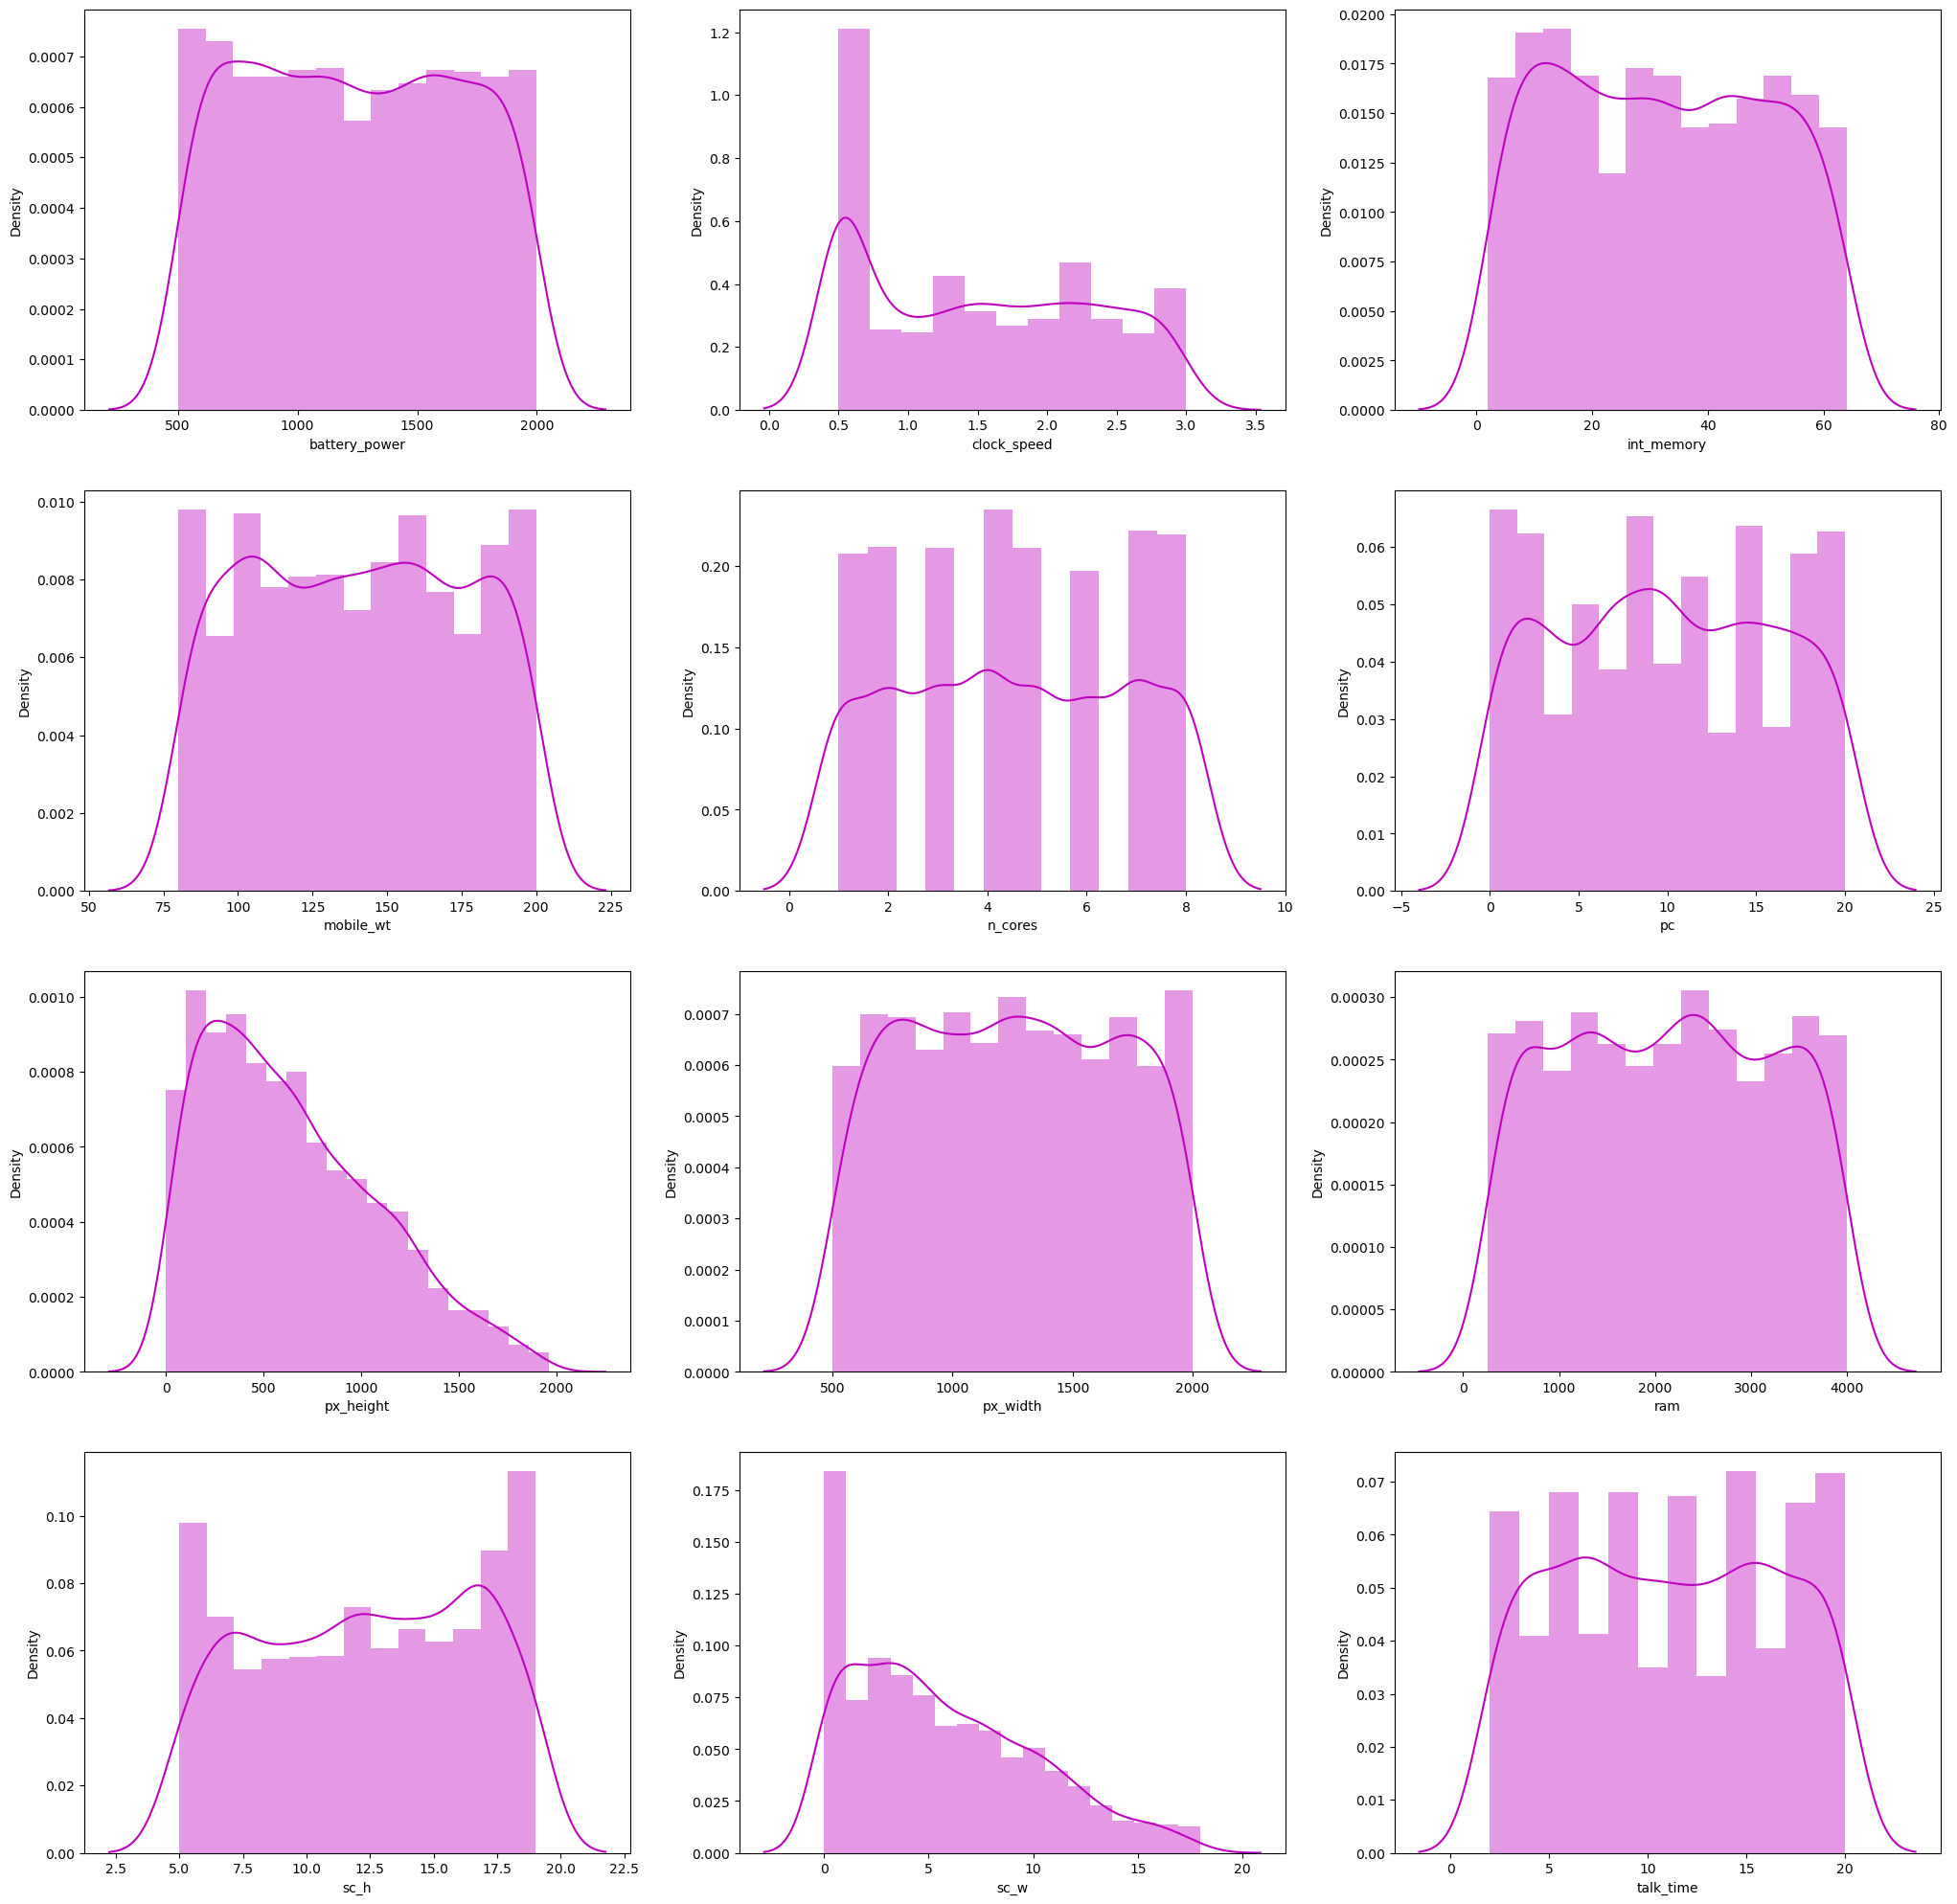

In [23]:
hist_plot = ["battery_power","clock_speed","int_memory","mobile_wt","n_cores","pc","px_height","px_width",
            "ram","sc_h","sc_w","talk_time","price_range"]

fig,ax = plt.subplots(4,3, figsize = (25,25))

for i,j in zip(hist_plot,ax.flatten()):
    sns.distplot(Mobile_Train[i],ax = j, color="m")
plt.show();

#CORRELATION HEAT MAP

<AxesSubplot:>

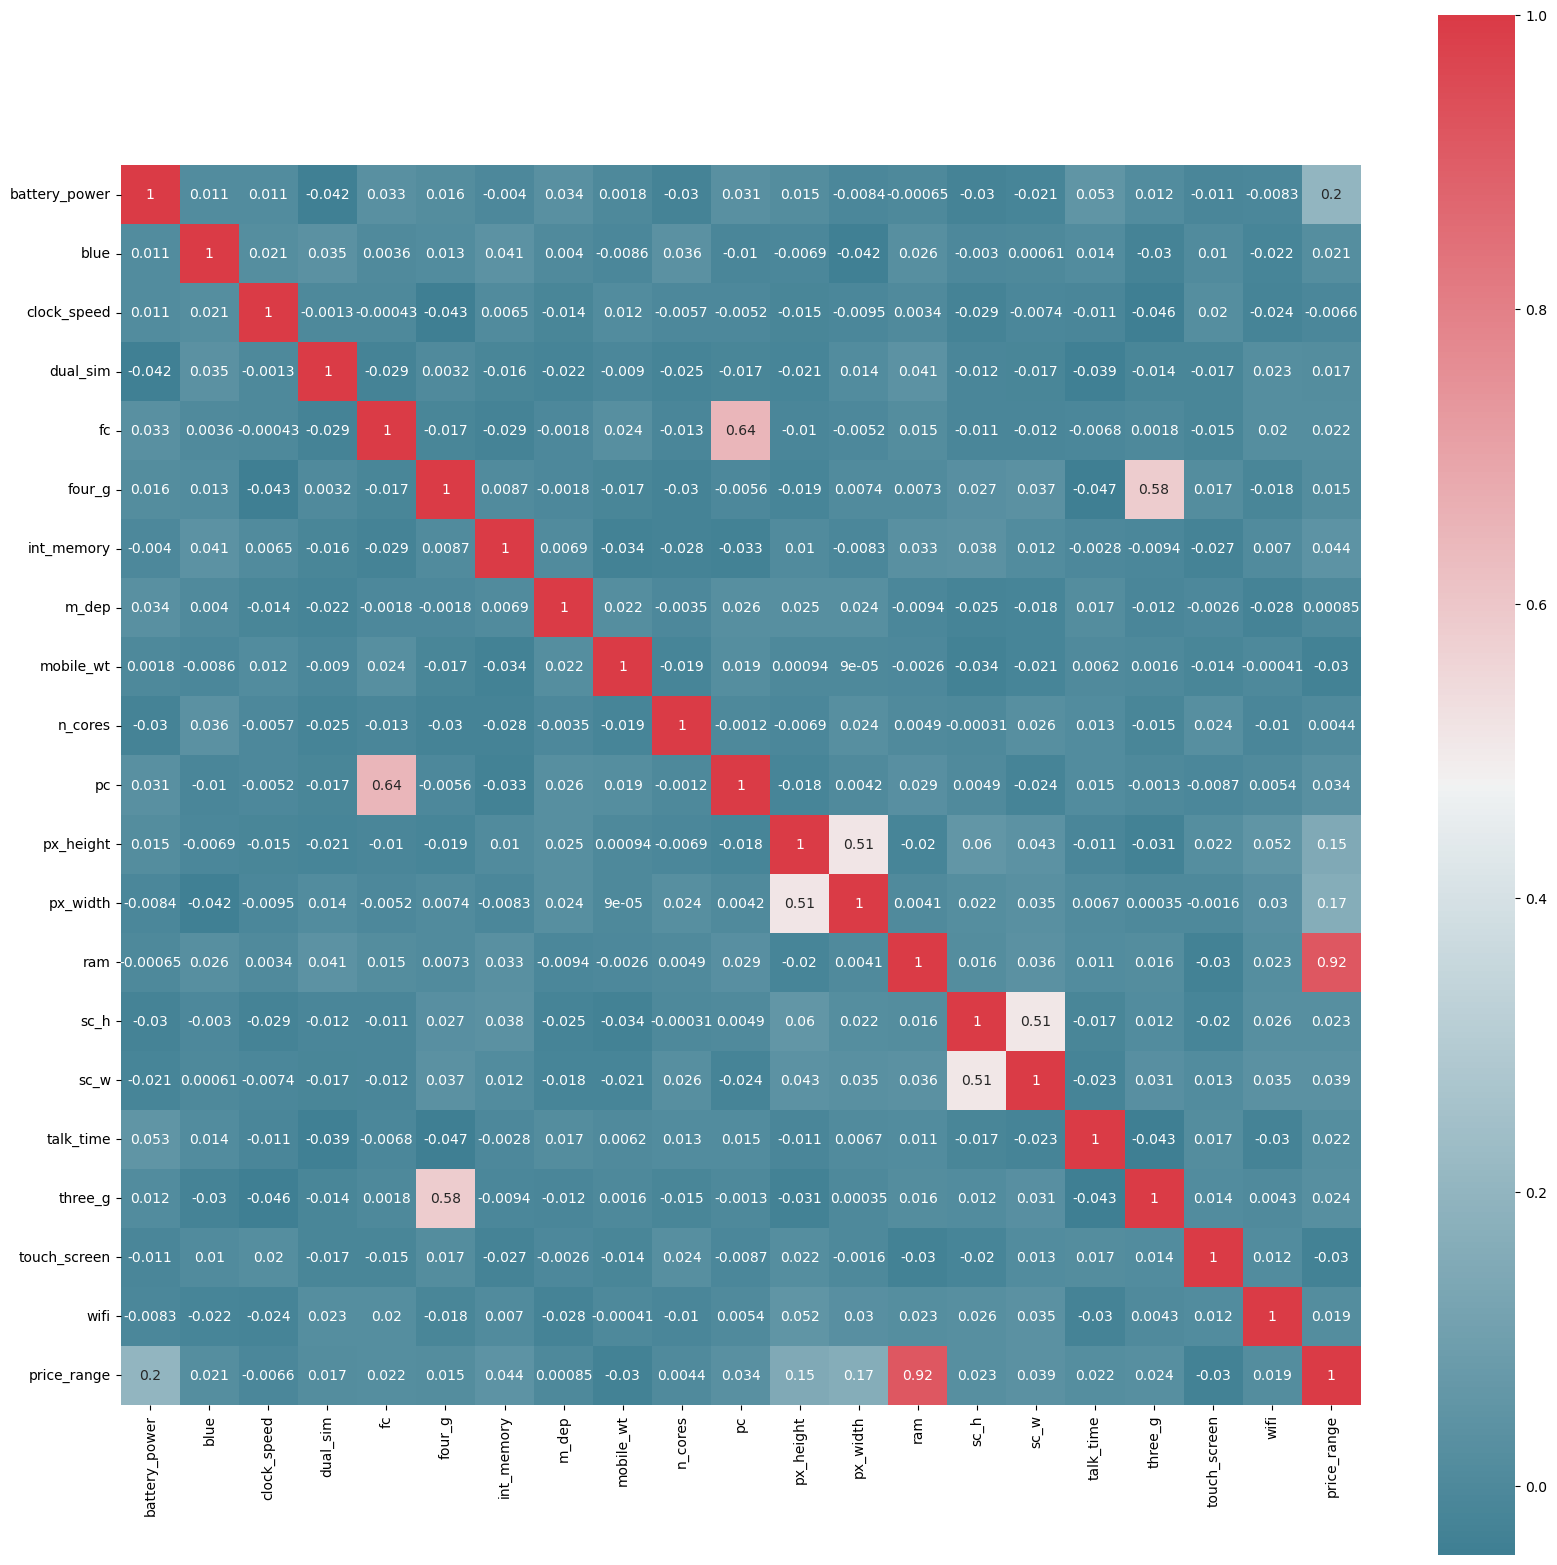

In [24]:
f, ax = plt.subplots(figsize=(20, 20))
corr =Mobile_Train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)


From the correlation heat map we can see that there is an high positive correlation between ram and price range.

In [25]:
correl = Mobile_Train.corr()
correl.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998


In [26]:
correl.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
talk_time,0.052510,0.013934,-0.011432,-0.039404,-0.006829,-0.046628,-0.002790,0.017003,0.006209,0.013148,...,-0.010645,0.006720,0.010820,-0.017335,-0.022821,1.000000,-0.042688,0.017196,-0.029504,0.021859
three_g,0.011522,-0.030236,-0.046433,-0.014008,0.001793,0.584246,-0.009366,-0.012065,0.001551,-0.014733,...,-0.031174,0.000350,0.015795,0.012033,0.030941,-0.042688,1.000000,0.013917,0.004316,0.023611
touch_screen,-0.010516,0.010061,0.019756,-0.017117,-0.014828,0.016758,-0.026999,-0.002638,-0.014368,0.023774,...,0.021891,-0.001628,-0.030455,-0.020023,0.012720,0.017196,0.013917,1.000000,0.011917,-0.030411
wifi,-0.008343,-0.021863,-0.024471,0.022740,0.020085,-0.017620,0.006993,-0.028353,-0.000409,-0.009964,...,0.051824,0.030319,0.022669,0.025929,0.035423,-0.029504,0.004316,0.011917,1.000000,0.018785
price_range,0.200723,0.020573,-0.006606,0.017444,0.021998,0.014772,0.044435,0.000853,-0.030302,0.004399,...,0.148858,0.165818,0.917046,0.022986,0.038711,0.021859,0.023611,-0.030411,0.018785,1.000000


<AxesSubplot:xlabel='price_range'>

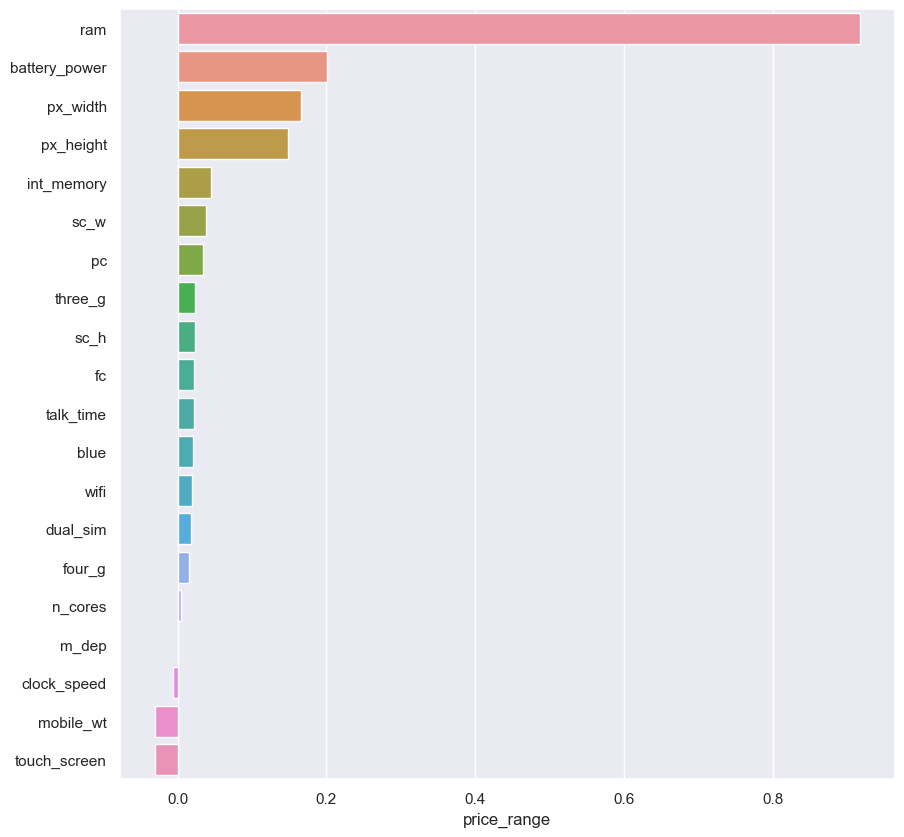

In [27]:
sns.set(rc = {'figure.figsize':(10,10)})
correlation = correl['price_range'].sort_values(ascending = False)
corrpric = correlation[1:]
sns.barplot(corrpric,corrpric.index)

#BIVARIATE VISUALIZATION

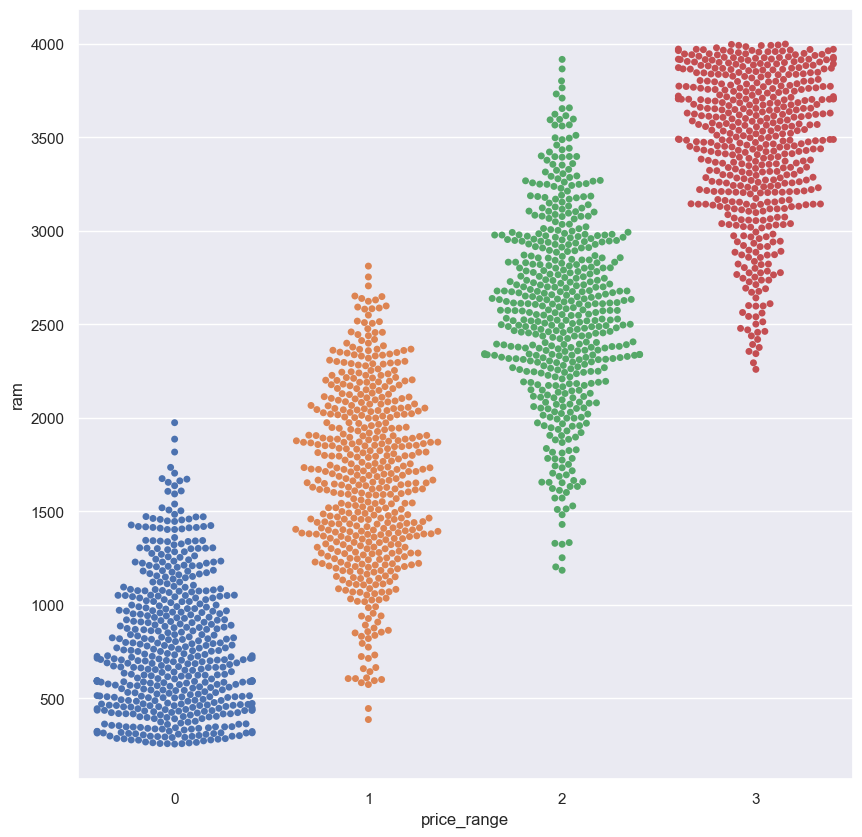

In [28]:
sns.swarmplot(x = "price_range",y = "ram",data =Mobile_Train)
plt.show()

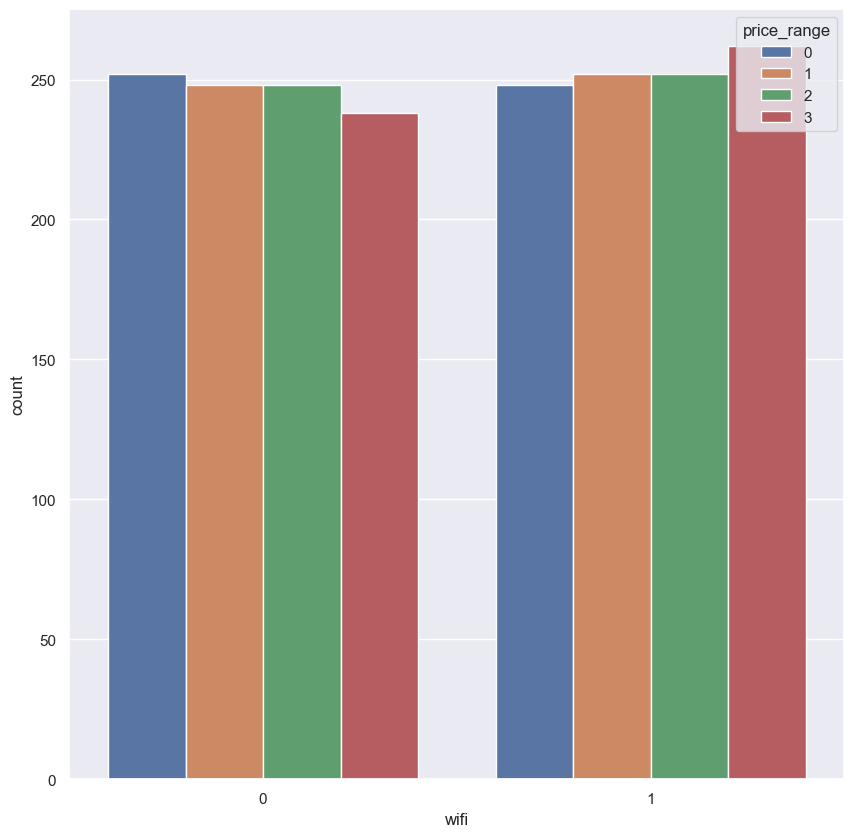

In [29]:
plt.figure(figsize=[10,10])
sns.countplot(x='wifi',hue='price_range',data=Mobile_Train)
plt.show()

In [30]:
pd.crosstab(columns=[Mobile_Train.price_range],index=[Mobile_Train.wifi],margins=True,normalize='index')

price_range,0,1,2,3
wifi,,,,
0,0.255578,0.251521,0.251521,0.241379
1,0.244576,0.248521,0.248521,0.258383
All,0.250000,0.250000,0.250000,0.250000


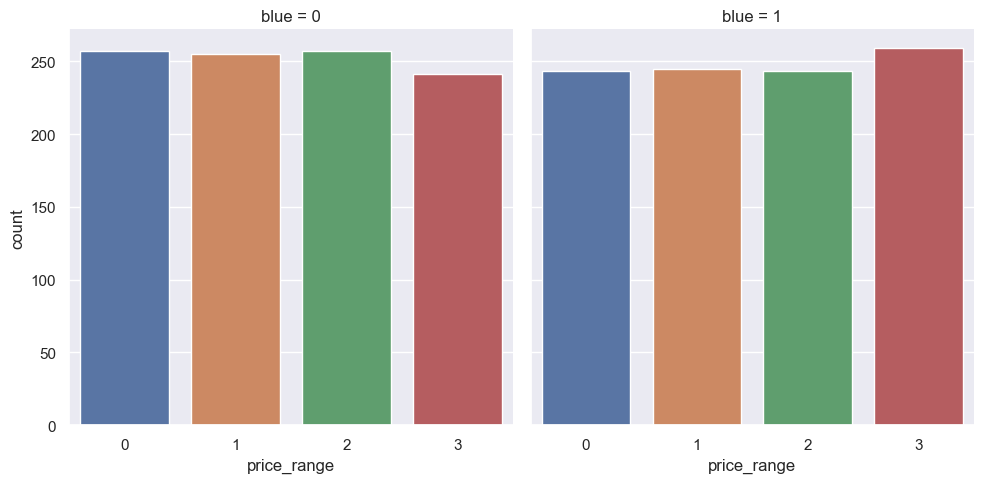

In [31]:
sns.factorplot(data=Mobile_Train,kind='count',x='price_range',col='blue')

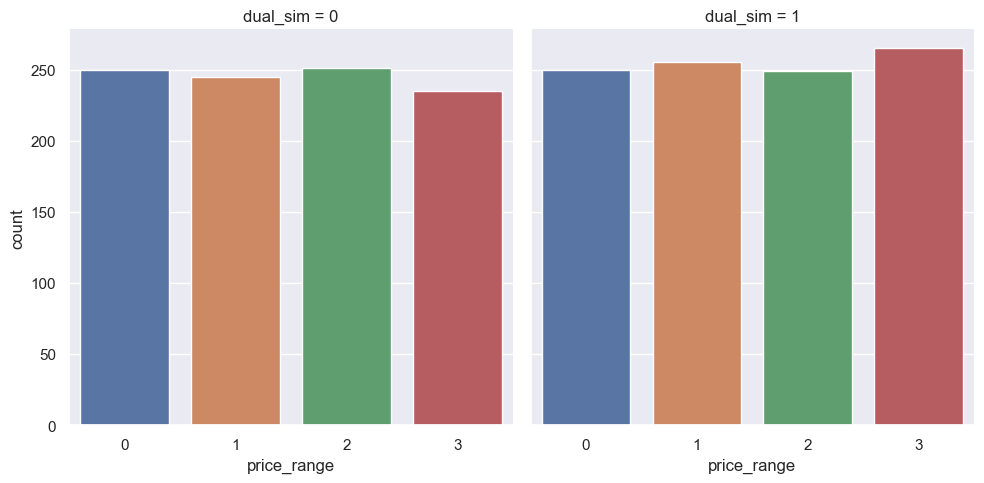

In [32]:
sns.factorplot(data=Mobile_Train,kind='count',x='price_range',col='dual_sim')

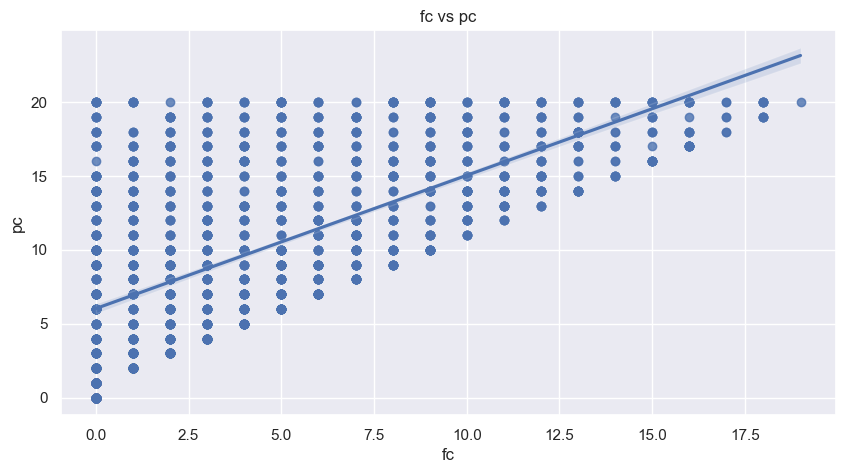

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(data=Mobile_Train,x='fc',y='pc')
plt.title("fc vs pc")
plt.show()

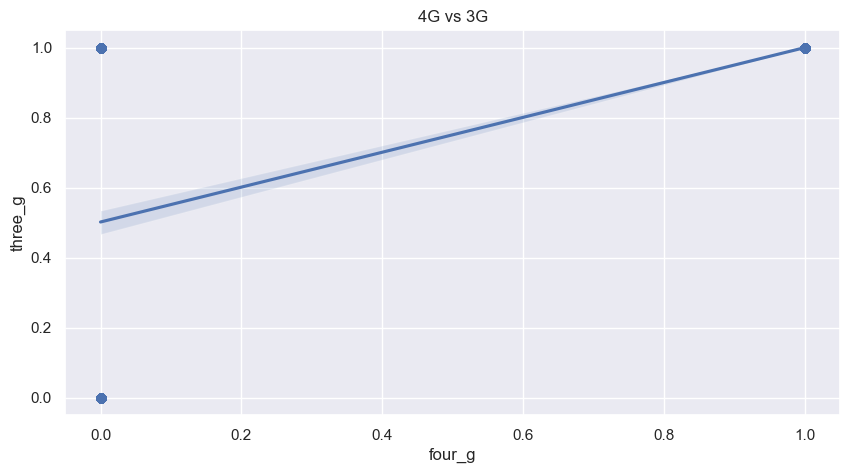

In [34]:
plt.figure(figsize=(10,5))
sns.regplot(data=Mobile_Train,x='four_g',y='three_g')
plt.title("4G vs 3G")
plt.show()

#MULTIVARIATE VISUALIZATION

<AxesSubplot:xlabel='four_g', ylabel='fc'>

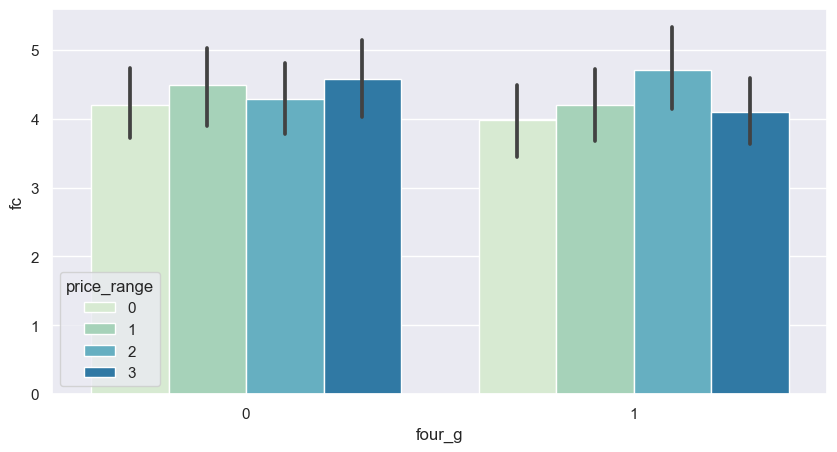

In [35]:
plt.figure(figsize=(10,5))
sns.barplot( x="four_g", y='fc',data=Mobile_Train,hue='price_range',palette='GnBu')

<AxesSubplot:xlabel='four_g', ylabel='pc'>

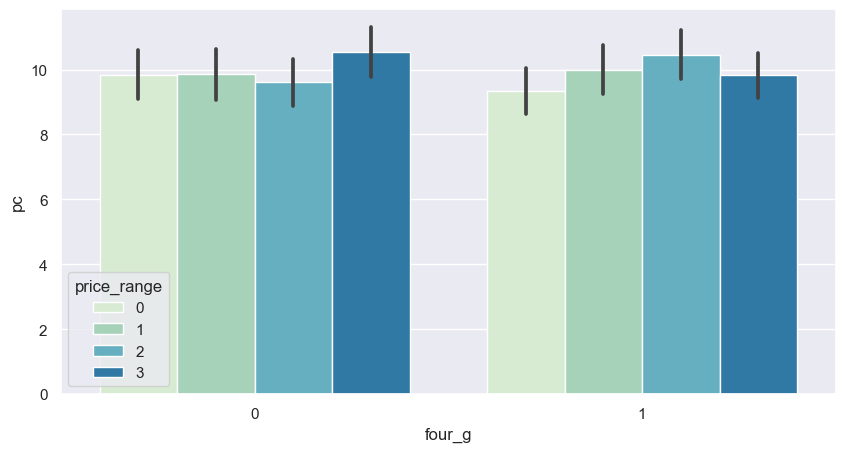

In [36]:
plt.figure(figsize=(10,5))
sns.barplot( x="four_g", y='pc',data=Mobile_Train,hue='price_range',palette='GnBu')

<Figure size 1600x600 with 0 Axes>

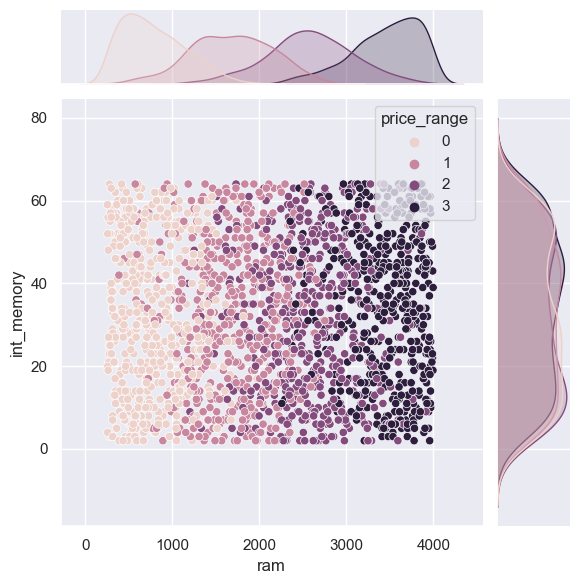

In [37]:
plt.figure(figsize = (16,6))
sns.jointplot(x='ram',y='int_memory',data=Mobile_Train,hue='price_range')
plt.show()

<Figure size 1600x600 with 0 Axes>

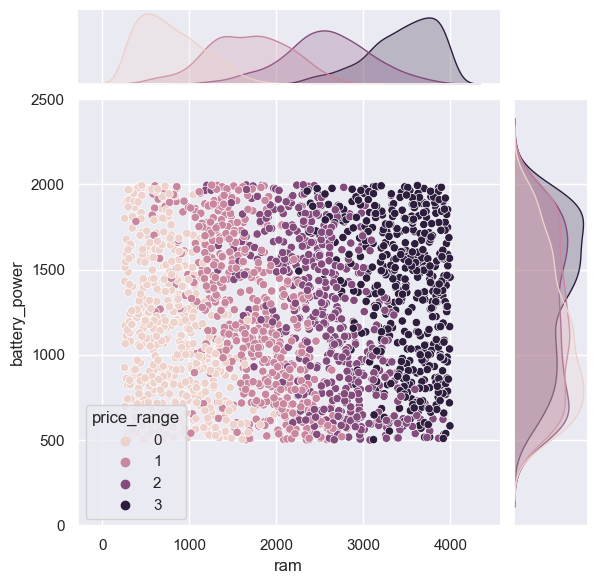

In [38]:
plt.figure(figsize = (16,6))
sns.jointplot(x='ram',y='battery_power',data=Mobile_Train,hue='price_range')
plt.show()

<Figure size 1600x600 with 0 Axes>

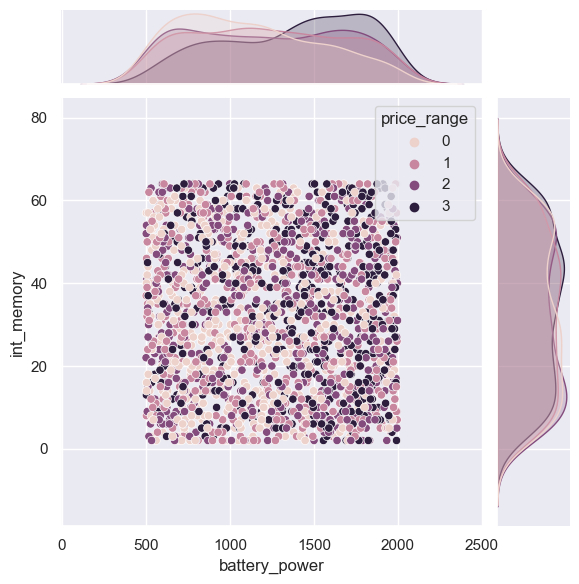

In [39]:
plt.figure(figsize = (16,6))
sns.jointplot(x='battery_power',y='int_memory',data=Mobile_Train,hue='price_range')
plt.show()

<AxesSubplot:xlabel='dual_sim', ylabel='talk_time'>

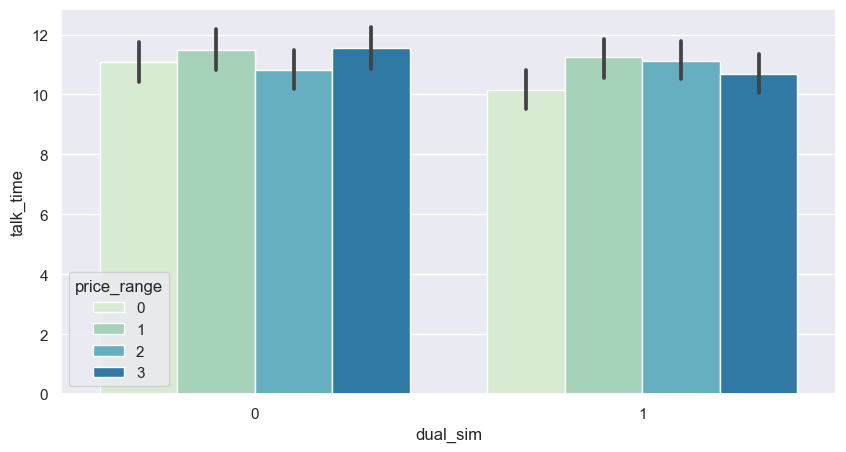

In [40]:
plt.figure(figsize=(10,5))
sns.barplot( x="dual_sim", y='talk_time',data=Mobile_Train,hue='price_range',palette='GnBu')

<AxesSubplot:xlabel='n_cores', ylabel='clock_speed'>

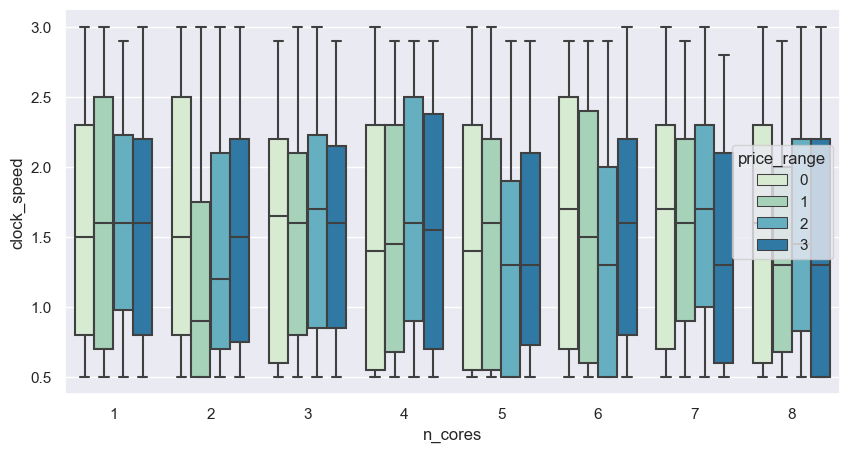

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x="n_cores", y="clock_speed", data=Mobile_Train,hue='price_range',palette='GnBu')

In [42]:
Mobile_Train.groupby(['n_cores','price_range'])['clock_speed'].median().to_frame()

clock_speed
n_cores price_range             
1       0                   1.50
        1                   1.60
        2                   1.60
        3                   1.60
2       0                   1.50
        1                   0.90
        2                   1.20
        3                   1.50
3       0                   1.65
        1                   1.60
        2                   1.70
        3                   1.60
4       0                   1.40
        1                   1.45
        2                   1.60
        3                   1.55
5       0                   1.40
        1                   1.60
        2                   1.30
        3                   1.30
6       0                   1.70
        1                   1.50
        2                   1.30
        3                   1.60
7       0                   1.70
        1                   1.60
        2                   1.70
        3                   1.30
8       0                   1.60
        1                   1.30
        2                   1.45
        3                   1.30

In [43]:
Mobile_Train.groupby(['n_cores','price_range'])['clock_speed'].mean().to_frame()

clock_speed
n_cores price_range             
1       0               1.546939
        1               1.593421
        2               1.630769
        3               1.573846
2       0               1.592754
        1               1.235593
        2               1.396491
        3               1.558065
3       0               1.546774
        1               1.537681
        2               1.601786
        3               1.564407
4       0               1.485075
        1               1.498684
        2               1.626027
        3               1.574138
5       0               1.464407
        1               1.490196
        2               1.296970
        3               1.457143
6       0               1.619672
        1               1.579630
        2               1.366667
        3               1.558621
7       0               1.563636
        1               1.570909
        2               1.688406
        3               1.423188
8       0               1.576119
        1               1.376667
        2               1.601429
        3               1.476271

# Classifying train data into two

In [44]:
data1 =Mobile_Train.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','price_range']]
data1

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,0,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,1
1,1021,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,2
2,563,1,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,2
3,615,1,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,2
4,1821,1,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,0
1996,1965,1,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,2
1997,1911,0,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,3
1998,1512,0,0,4,1,46,0.1,145,5,5,336,670,869,18,10,0


In [45]:
data2 =Mobile_Train.loc[:,['talk_time','three_g','wifi','touch_screen','clock_speed']]
data2

,talk_time,three_g,wifi,touch_screen,clock_speed
0,19,0,1,0,2.2
1,7,1,0,1,0.5
2,9,1,0,1,0.5
3,11,1,0,0,2.5
4,15,1,0,1,1.2
...,...,...,...,...,...
1995,19,1,0,1,0.5
1996,16,1,1,1,2.6
1997,5,1,0,1,0.9
1998,19,1,1,1,0.9


In [46]:
data3=pd.concat([data1, data2], axis=1)
data3

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,price_range,talk_time,three_g,wifi,touch_screen,clock_speed
0,842,0,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,1,19,0,1,0,2.2
1,1021,1,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,2,7,1,0,1,0.5
2,563,1,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,2,9,1,0,1,0.5
3,615,1,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,2,11,1,0,0,2.5
4,1821,1,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,1,15,1,0,1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,0,19,1,0,1,0.5
1996,1965,1,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,2,16,1,1,1,2.6
1997,1911,0,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,3,5,1,0,1,0.9
1998,1512,0,0,4,1,46,0.1,145,5,5,...,670,869,18,10,0,19,1,1,1,0.9


# Feature Engineering

In [47]:
x=Mobile_Train.drop(['price_range'],axis=1)
y=Mobile_Train['price_range']

In [48]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 12 best features

         Features          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


In [49]:
#Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [50]:
print(model.feature_importances_)

[0.06118582 0.0189948  0.0331474  0.01889229 0.03235427 0.01695909
 0.03507485 0.03413354 0.03525042 0.03264582 0.03297883 0.04637743
 0.04897363 0.39958792 0.03251662 0.03335448 0.03434864 0.01401238
 0.01914635 0.02006544]


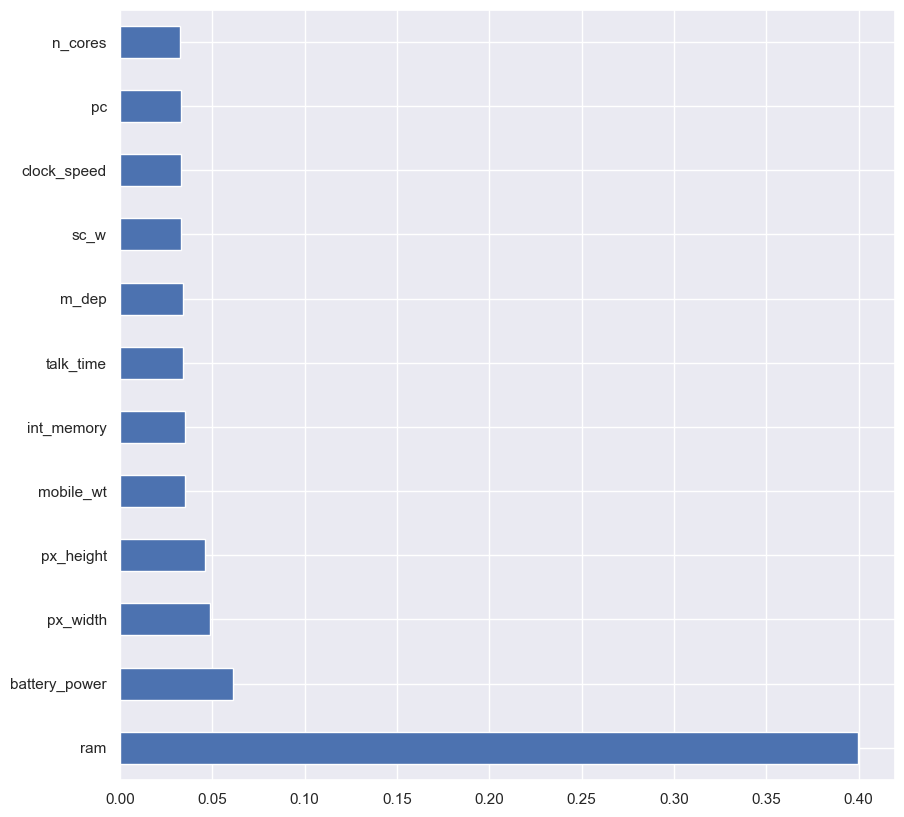

In [51]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

Here ram, battery_power, px_width, px_height, mobile_wt, talk_time, int_memory, sc_h, pc, etc, are the most important features.

# Modelling

In [52]:
#Separating input and output columns
x=Mobile_Train.drop(['price_range'],axis=1)
y=Mobile_Train['price_range']

In [53]:
print("Feature data dimension: ", x.shape) 

Feature data dimension:  (2000, 20)


# Feature Scaling

In [54]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=scaler.fit_transform(x)

#SPLITTING OF DATA

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [56]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (1500, 20)
x_test: (500, 20)
y_train: (1500,)
y_test: (500,)


In [57]:
y=Mobile_Train["price_range"]
y.value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

Target column 'price_range' is balanced.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression

In [59]:
log_model= LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [60]:
y_pred = log_model.predict(x_test)

In [61]:
# Summary of the predictions made by the classifier
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from Logistic Regression ")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.962
Results from Logistic Regression 


,precision,recall,f1-score,support
0,0.983871,0.976000,0.979920,125.000000
1,0.936364,0.936364,0.936364,110.000000
2,0.928000,0.958678,0.943089,121.000000
3,0.992908,0.972222,0.982456,144.000000
accuracy,0.962000,0.962000,0.962000,0.962000
macro avg,0.960286,0.960816,0.960457,500.000000
weighted avg,0.962501,0.962000,0.962155,500.000000


In [62]:
confusion_matrix(y_test,y_pred)

array([[122,   2,   0,   0],
       [  3, 103,   4,   0],
       [  0,   5, 116,   4],
       [  0,   0,   1, 140]], dtype=int64)

# Decision Tree

In [63]:
dt_model=DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
# Summary of the predictions made by the classifier
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from Decision Tree")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.848
Results from Decision Tree


,precision,recall,f1-score,support
0,0.895161,0.932773,0.913580,119.000000
1,0.845455,0.781513,0.812227,119.000000
2,0.776000,0.782258,0.779116,124.000000
3,0.872340,0.891304,0.881720,138.000000
accuracy,0.848000,0.848000,0.848000,0.848000
macro avg,0.847239,0.846962,0.846661,500.000000
weighted avg,0.847481,0.848000,0.847318,500.000000


In [64]:
confusion_matrix(y_test, y_pred )

array([[111,  13,   0,   0],
       [  8,  93,   9,   0],
       [  0,  13,  97,  15],
       [  0,   0,  18, 123]], dtype=int64)

# K-NN

In [65]:
acc_values = [] 
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)  

[0.482, 0.512, 0.506, 0.514, 0.506, 0.53, 0.546, 0.556, 0.538, 0.558, 0.574, 0.59]


Text(0, 0.5, 'Accuracy')

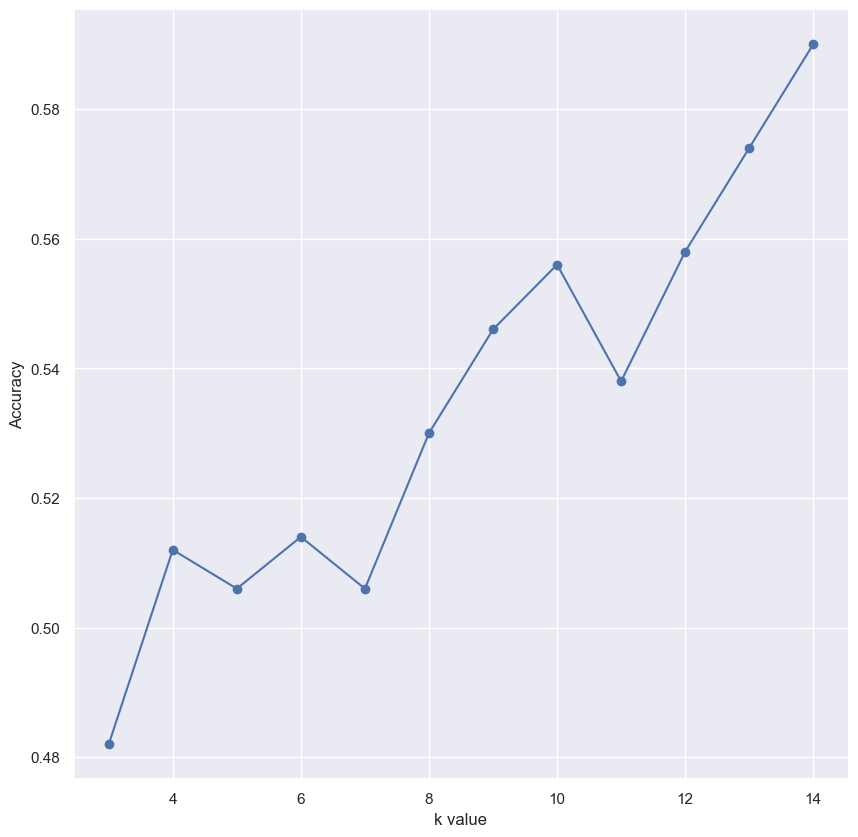

In [66]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [67]:
classifier = KNeighborsClassifier(n_neighbors = 14,metric = 'minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
# Summary of the predictions made by the classifier
print('accuracy score is :',accuracy_score(y_test,y_pred))
print("Results from K-NN")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

accuracy score is : 0.59
Results from K-NN


,precision,recall,f1-score,support
0,0.725806,0.725806,0.725806,124.000000
1,0.536364,0.421429,0.472000,140.000000
2,0.488000,0.458647,0.472868,133.000000
3,0.602837,0.825243,0.696721,103.000000
accuracy,0.590000,0.590000,0.590000,0.590000
macro avg,0.588252,0.607781,0.591849,500.000000
weighted avg,0.584174,0.590000,0.581468,500.000000


In [68]:
confusion_matrix(y_test,y_pred)

array([[90, 30,  4,  0],
       [27, 59, 21,  3],
       [ 7, 42, 61, 15],
       [ 0,  9, 47, 85]], dtype=int64)

# RandomForest Classifier

In [69]:
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [70]:
y_pred = rf_model.predict(x_test)
# Summary of the predictions made by the classifier
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from RandomForest Classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.874
Results from RandomForest Classifier


,precision,recall,f1-score,support
0,0.983871,0.945736,0.964427,129.000000
1,0.827273,0.805310,0.816143,113.000000
2,0.744000,0.808696,0.775000,115.000000
3,0.929078,0.916084,0.922535,143.000000
accuracy,0.874000,0.874000,0.874000,0.874000
macro avg,0.871055,0.868956,0.869526,500.000000
weighted avg,0.877639,0.874000,0.875366,500.000000


In [71]:
confusion_matrix(y_test,y_pred)

array([[122,   2,   0,   0],
       [  7,  91,  12,   0],
       [  0,  20,  93,  12],
       [  0,   0,  10, 131]], dtype=int64)

In [72]:
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
am_svm = accuracy_score(y_test, y_pred)*100
# Summary of the predictions made by the classifier
print("Accuracy of SVM classifier is {}".format(am_svm))
print("Results from SVM")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy of SVM classifier is 95.19999999999999
Results from SVM


,precision,recall,f1-score,support
0,0.975806,0.968000,0.971888,125.000000
1,0.927273,0.918919,0.923077,111.000000
2,0.912000,0.950000,0.930612,120.000000
3,0.985816,0.965278,0.975439,144.000000
accuracy,0.952000,0.952000,0.952000,0.952000
macro avg,0.950224,0.950549,0.950254,500.000000
weighted avg,0.952601,0.952000,0.952168,500.000000


In [73]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[121   3   0   0]
 [  4 102   4   0]
 [  0   6 114   5]
 [  0   0   2 139]]


# Gradient boosting classifier

In [74]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred=GBC.predict(x_test)
# Summary of the predictions made by the classifier
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from Gradient boosting classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.922
Results from Gradient boosting classifier


,precision,recall,f1-score,support
0,0.975806,0.975806,0.975806,124.000000
1,0.909091,0.900901,0.904977,111.000000
2,0.872000,0.865079,0.868526,126.000000
3,0.929078,0.942446,0.935714,139.000000
accuracy,0.922000,0.922000,0.922000,0.922000
macro avg,0.921494,0.921058,0.921256,500.000000
weighted avg,0.921846,0.922000,0.921902,500.000000


In [75]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[121   3   0   0]
 [  3 100   7   0]
 [  0   8 109   8]
 [  0   0  10 131]]


#CALLING TEST DATA 

In [76]:
Mobile_Test=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\MobileDataSets\MobileDataSets\MobileTest.csv',index_col = 'id')
Mobile_Test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0


In [77]:
test_scaled=scaler.fit_transform(Mobile_Test)
test_scaled

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

#PREDICTING THE 'price_range' OF TEST DATA

#Logistic Regression gives the highest accuracy score.

In [78]:
test_predict=log_model.predict(test_scaled)

In [79]:
result=pd.DataFrame(test_predict)
result

,0
0,2
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,0
998,2


In [80]:
print("Train accuracy", log_model.score(x_train,y_train))

Train accuracy 0.9793333333333333


In [81]:
print("Test accuracy", log_model.score(x_test,y_test))

Test accuracy 0.962


In [82]:
result.to_csv('result.csv')

# Ranking Features of Smartphone

#RANKING DATASET ACCORDING TO 'price_range'

In [83]:
Mobile_Train["rank_by_price"]=Mobile_Train["price_range"].rank()
data=Mobile_Train
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [84]:
#Sorting above dataset according to ranked_price_range
data.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [85]:
#Ranking all features of dataset using rank()
RankedData=data.rank()
RankedData.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [86]:
#Ranking all the features separately to correct the output
#Because not all features are good when values are high or low
#It depends on each and every feature.
r= data
r["rank_by_price"] = r["price_range"].rank()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False)
r["rank_by_blueooth"] = r["blue"].rank(ascending=False)
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False)
r["rank_by_fc"] = r["fc"].rank(ascending=False)
r["rank_by_4G"] = r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False)
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False)
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=True)
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False)
r["rank_by_pc"] = r["pc"].rank(ascending=False)
r["rank_by_height"] = r["px_height"].rank(ascending=False)
r["rank_by_width"] = r["px_width"].rank(ascending=False)
r["rank_by_ram"] = r["ram"].rank(ascending=False)
r["rank_by_sch"] = r["sc_h"].rank(ascending=False)
r["rank_by_scw"] = r["sc_w"].rank(ascending=False)
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False)
r["rank_by_3G"] = r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"] = r["wifi"].rank(ascending=False)
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [87]:
RankedData=r.iloc[:,21:]
RankedData

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5
